# 1. tensorflow

## - CPU

In [1]:
import tensorflow as tf
import sys
print(sys.version) # 파이썬 버전
print(tf.__version__)

3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
2.13.0


In [2]:
# 상수 선언
hello = tf.constant('Hello World')
print(hello)

# 텐서는 cpu, gpu에 존재, 컴퓨터로 가져오려면 numpy()로 호출해야함
# 다국어를 지원하기위해서 바이트로 저장 후 꺼내옴
print(hello.numpy()) # 바이트 배열

print(hello.numpy().decode('utf-8')) # 바이트 배열을 스트링으로 변환 (인코딩)
# utf-8         3바이트
# euc-kr(ms949) 2바이트

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)
# c = a+b
print(c.numpy())
print([a.numpy(), b.numpy(), c.numpy()])

tf.Tensor(b'Hello World', shape=(), dtype=string)
b'Hello World'
Hello World
42
[10, 32, 42]


In [3]:
node1=tf.constant(3.0)
node2=tf.constant(4.0)
node3=tf.add(node1,node2)
print(node3.numpy())

7.0


In [4]:
def output(a,b):
    return tf.multiply(a, b)

print(output(3.0, 5.0).numpy())
print(output(0.0, 6.0).numpy())
print(output([2.0,3.1,7.4], [6.0,2.5,3.1]).numpy())

15.0
0.0
[12.    7.75 22.94]


In [5]:
#텐서플로의 변수 선언
W = tf.Variable([0.3], dtype=tf.float32) # weight 가중치
b = tf.Variable([-0.3], dtype=tf.float32) # bias 편향값

def linear_model(x):
    return tf.multiply(W,tf.add(x,b))

x=[1.,2.,3.,4.]

# x의 값에 따라 linear_model 계산
linear_model(x).numpy()

array([0.21000001, 0.51000005, 0.81000006, 1.11      ], dtype=float32)

In [6]:
import numpy as np

X = np.array([[1,2,3],[4,5,6]])

print(X.shape)
print('X\n',X)

#               랜덤으로 정수 만들기
W = np.array([[np.random.randint(10) for col in range(2)] for row in range(3)])

print(W.shape)
print('W\n',W)

b = np.array([[np.random.randint(10) for col in range(1)] for row in range(2)])

print(b.shape)
print('b\n',b)

(2, 3)
X
 [[1 2 3]
 [4 5 6]]
(3, 2)
W
 [[2 7]
 [9 7]
 [1 1]]
(2, 1)
b
 [[7]
 [8]]


In [7]:
def expr(X):
    return tf.matmul(X, W) + b #행렬 곱셈

expr(X).numpy()

array([[30, 31],
       [67, 77]])

## - GPU

In [1]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [2]:
# 실행가능한 gpu 목록
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
#실행가능한 cpu, gpu 목록
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16748738424048902916
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1383870875
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17567269364792391740
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

In [4]:
#기본적으로 gpu로 실행됨
tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [5]:
tf.debugging.set_log_device_placement(True)

#cpu에서 실행시키는 방법
with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
    print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [6]:
tf.debugging.set_log_device_placement(True)

#gpu에서 실행시키는 방법
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
    print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [1]:
# gpu memory는 기본적으로 full size로 설정됨
# gpu 메모리를 탄력적으로 사용하는 방법

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

#gpu의 메모리를 점진적으로 늘리도록 설정
tf.config.experimental.set_memory_growth(gpus[0],True)

#메모리 사용량을 직접 지정하는 방법
#tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=512)])
#3가지 옵션을 바꿔가면서 gpu 메모리 사용량 확인

hello = tf.constant('Hello World')  
print(hello)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
tf.Tensor(b'Hello World', shape=(), dtype=string)


# 2. 케라스(keras)

## - 회귀분석1

In [8]:
import numpy as np
np.random.seed(7)

#데이터 로딩, 시작36행은 건너뜀
data=np.genfromtxt("./data/x09.txt",skip_header=36)
data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

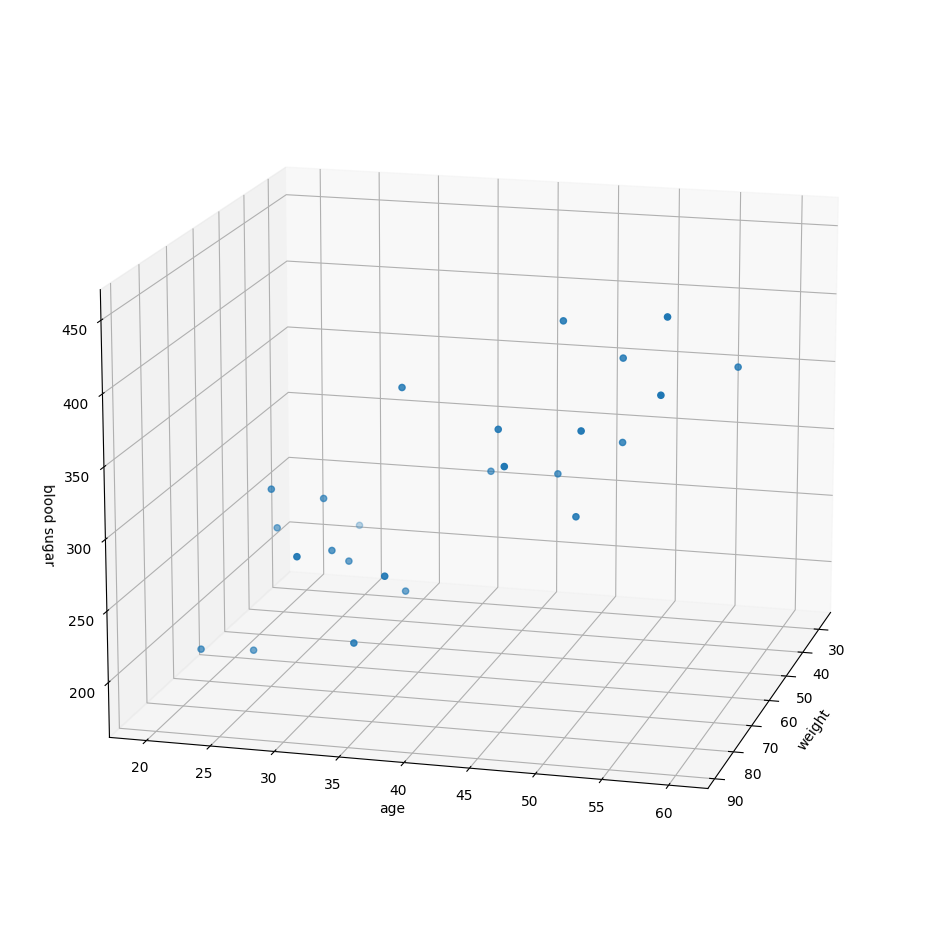

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xdata=np.array(data[:,2],dtype=np.float32) # 세번째 컬럼
ydata=np.array(data[:,3],dtype=np.float32) # 네번째 컬럼
zdata=np.array(data[:,4],dtype=np.float32) # 다섯번째 컬럼

fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15) #출력 각도 설정

plt.show()

In [10]:
xdata.shape, ydata.shape, zdata.shape

((25,), (25,), (25,))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

#데이터를 케라스에 맞게 변환

#독립변수
x_data=np.array(data[:,2:4],dtype=np.float32)

#종속변수
y_data=np.array(data[:,4],dtype=np.float32)

In [12]:
x_data.shape, y_data.shape

((25, 2), (25,))

In [13]:
#회귀분석 모델 생성
model=Sequential()

# Dense(output, input_shape=입력데이터 차원)
# (2,) 1차원 / (2,3) 2차원
model.add(Dense(1,input_shape=(2,)))

# input     output
# 나이*w    혈당수치
# 체중*w
# bias 

#손실함수 : 인공신경망에서 학습을 통해 최적의 가중치 매개변수를 결정하기 위한 기준으로 사용하는 함수(오차를 계산하는 함수)
#최적화함수 : 오차를 줄이기 위해 weight, bias 를 수정하는 함수
#손실함수의 결과값을 가장 작게 만드는 것이 신경망 학습의 목표
#손실함수의 결과값을 작게 만들기 위해 가중치 매개변수를 조절해가는 과정이 학습 과정
#평균제곱오차(Meam Squared Error, MSE), 회귀분석에서 많이 사용하는 손실함수
# https://keras.io/ko/optimizers/  옵티마이저 참조

rmsprop=RMSprop(learning_rate=0.01) #학습률 0.01
model.compile(loss='mse',optimizer=rmsprop)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


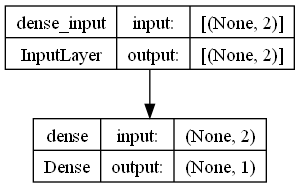

In [14]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [15]:
# 히스토리 = 모델.fit(독립, 종속, 반복횟수)
hist=model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 310ms/step - loss: 77239.0469
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 75366.9766
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 74032.4062
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 72928.8438
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 71959.3672
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 71079.0469
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 70262.9531
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 69495.5469
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 68766.4531
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 68068.3594
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 67395.8828
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 66744.9688

In [16]:
hist.history.keys()

dict_keys(['loss'])

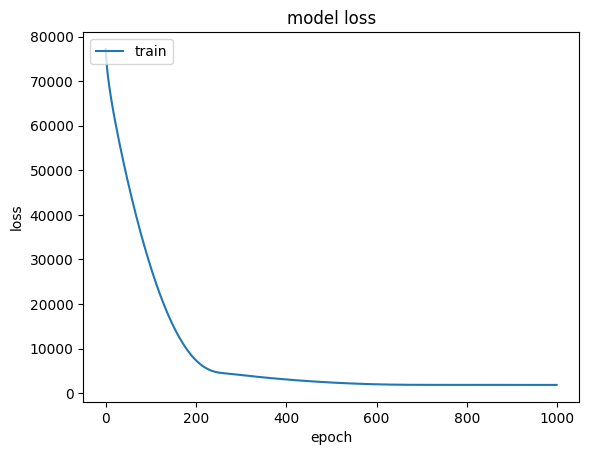

In [17]:
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"],loc="upper left")

plt.show()

In [18]:
#새로운 데이터로 예측
#체중 100kg, 40세
#1차원 배열을 1행 2열의 2차원 배열로 변환

model.predict(np.array([100,40]).reshape(1,2))
# model.predict(np.array([[100,40]]))

1/1 [==============================] - 0s 82ms/step


array([[350.49722]], dtype=float32)

In [19]:
#체중 60kg, 25세
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 21ms/step


array([[219.6164]], dtype=float32)

In [20]:
#회귀선을 그리기 위한 작업
#가중치와 절편,편향(bias)

w, b = model.get_weights()
w, b

(array([[1.1933155],
        [5.5432143]], dtype=float32),
 array([9.437105], dtype=float32))

In [21]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수

x=np.linspace(20,100,50).reshape(50,1)
y=np.linspace(10,70,50).reshape(50,1)
x2=np.concatenate((x,y),axis=1) #x,y연결

#행렬곱셈
z=np.matmul(x2,w)+b

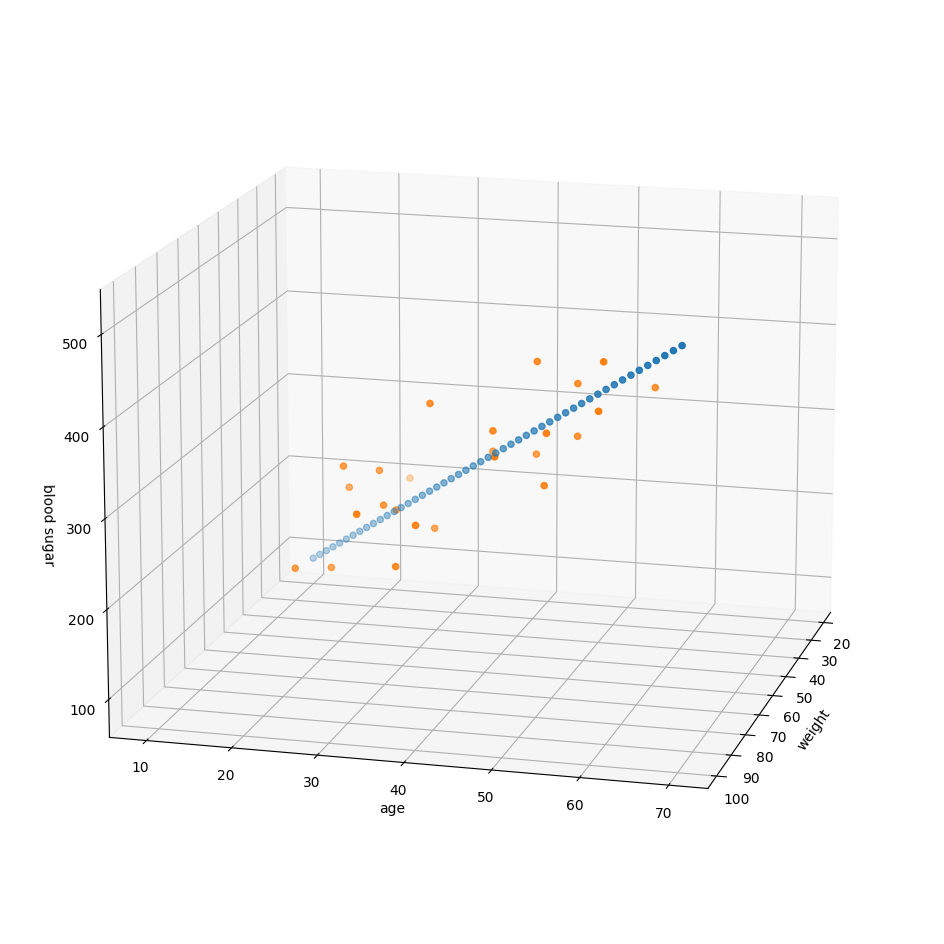

In [22]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')

#회귀선
ax.scatter(x,y,z)

#산점도
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15)

plt.show()

## - 회귀분석2(주택가격 데이터셋)

In [23]:
# pip install opencv-python

In [1]:
# 주택 가격 예측: 회귀분석
# 회귀분석 : 연속적인 값을 예측
# 예) 과거 기상 데이터를 입력하여 내일의 기온을 예측
# 보스턴 주택 가격 데이터셋
# 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터로 주택 가격 예측
# 샘플 개수 : 506개(학습용 404개, 검증용 102개)

from keras.datasets import boston_housing

# c:/사용자/본인계정/.keras/datasets 디렉토리에 다운로드됨
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [2]:
#학습용 404개, 검증용 102개, 13개의 변수

print(X_train.shape)
print(X_train.shape[1])
X_test.shape

(404, 13)
13


(102, 13)

* 독립 변수 목록
1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
 4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

* 종속변수 : 주택의 가격(천달러 단위)
    - 주택가격(10000~50000달러, 1970년대 중반 가격)

In [3]:
# 주택가격
y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

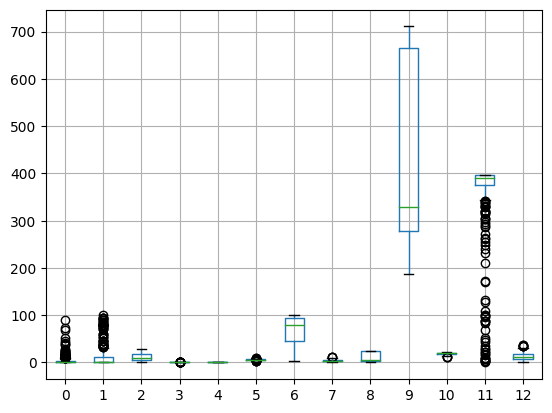

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(X_train).boxplot()
plt.show()

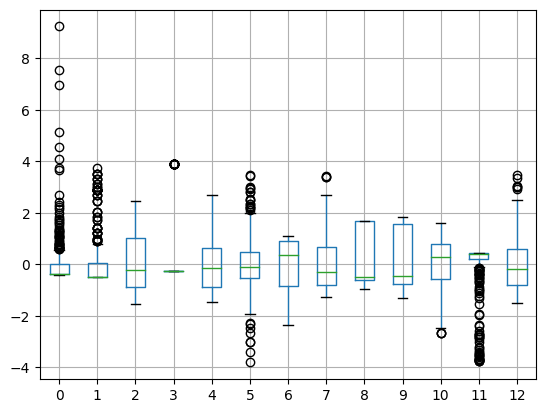

In [5]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

pd.DataFrame(X_train_scaled).boxplot()
plt.show()

In [6]:
# 활성화 함수 : 입력데이터를 적절하게 처리하여 출력데이터를 만들어내는 함수
# input data -> {activation function} -> output data
# 활성화 함수의 종류 : 탄젠트(thanh) 함수, 시그모이드(sigmoid) 함수, ReLU 함수
# 탄젠트 함수나 시그모이드 함수보다 학습시간이 빨라서
#    최근에는 ReLU(Rectified Linear Unit)가 많이 사용되고 있음

from keras import models, layers

#64개의 노드를 가진 은닉층 2개의 신경망
def build_model():
    model = models.Sequential() # 신경망 모델
    #relu
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))

    #출력층(1개의 노드, 하나의 값을 예측하는 회귀분석의 경우
    #   활성화 함수가 없는 선형층을 사용함)
    # 활성화함수를 안쓰면 디폴드값이 activation='linear' (항등함수)
    model.add(layers.Dense(1))
    
    #mse 손실 함수를 사용하여 컴파일
    #mse : 평균 제곱 오차(mean squared error) - 예측값과 실제값의 거리의 제곱
    #mae : 평균 절대 오차, 예측값과 실제값의 거리의 절대값
    #metrics 성능평가지표, 검증용 데이터셋으로 평가하는 기준
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


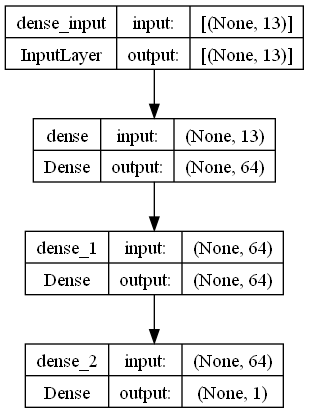

In [7]:
from keras.utils import plot_model  
plot_model(model,show_shapes=True)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def train(x_train, y_train, epochs=21):
    for epoch in np.arange(1, epochs):
      hist=model.fit(x_train, y_train)
      plt.plot(y_train, c='r', label='real')
      plt.plot(model.predict(x_train), c='b', label='pred')
      plt.legend()
      
      mae=hist.history['mae'][0]
      
      plt.title(f"Epoch {epoch:02d}, mae {mae:.2f}")
      plt.savefig(f"img/plot_{epoch:02d}.png")
      plt.clf()

train(X_train_scaled, y_train)

13/13 [==============================] - 0s 1ms/step


In [10]:
import cv2
import glob

img_array=[]
size = (0,0)

for filename in sorted(glob.glob('img/*.png')):
    img=cv2.imread(filename) # 이미지를 읽어옴
    height,width,layers=img.shape # 세로, 가로, 채널 (흑백일땐 0채널, 컬러일땐 3채널)
    size=(width,height)
    img_array.append(img)

out=cv2.VideoWriter('model.mp4', cv2.VideoWriter_fourcc(*'H264'), 0.5, size) # 코덱, 속도, 사이즈

for i in range(len(img_array)):
    out.write(img_array[i])

out.release()

In [11]:
hist=model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 13.2981 - mae: 2.5748
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 12.6970 - mae: 2.4833
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 12.3956 - mae: 2.4715
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 12.3451 - mae: 2.5242
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 11.9525 - mae: 2.4375
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 11.7571 - mae: 2.4285
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 11.3806 - mae: 2.4123
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 11.4638 - mae: 2.3964
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 10.9635 - mae: 2.3819
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 11.0814 - mae: 2.3799
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - los

4/4 [==============================] - 0s 2ms/step - loss: 19.3686 - mae: 2.6810
19.368635177612305
2.681006669998169


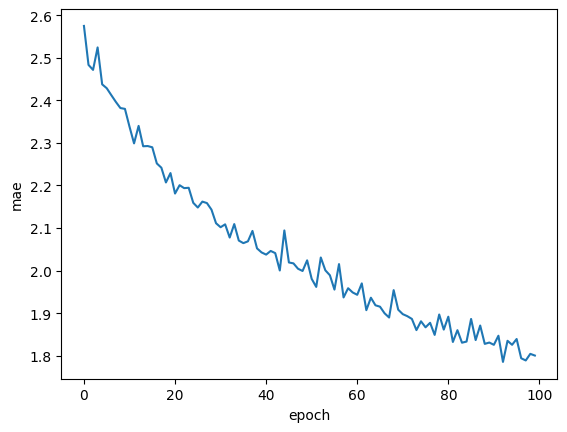

In [12]:
# 검증용 데이터로 모델 평가
mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)

print(mse)
print(mae) 

plt.plot(hist.history["mae"])
plt.ylabel("mae")
plt.xlabel("epoch")
plt.show()

## - iris

In [1]:
import seaborn as sns

#붓꽃 데이터셋 로딩
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
#품종 확인
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X=iris.iloc[:, :4].values # 독립변수
y=iris.iloc[:,4].values  #종속변수
print(y[:5])

encoder=LabelEncoder() #문자열에 label을 붙임
y1=encoder.fit_transform(y)
print(y1[:5])

# 손실함수 categorical_crossentropy 사용을 위한 원핫인코딩
y2=pd.get_dummies(y1).values # 소프트맥스 다중분류 종속변수에 대한 원핫인코딩 처리
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


In [4]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y,random_state=10)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#모델 생성
model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax')) # 다중분류
sgd = SGD(learning_rate=0.01)  

# loss 회귀분석일때 mse, 다중분류 categorical_crossentropy, 이진분류 binary_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) # 원핫인코딩
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4675 (18.26 KB)
Trainable params: 4675 (18.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


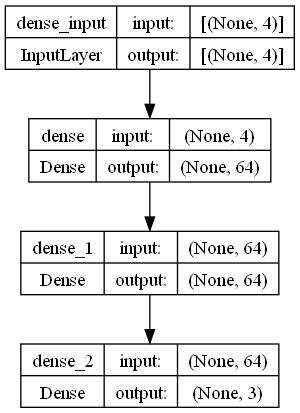

In [6]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [7]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

# 조기학습종료 - validation loss 기준 종료횟수만큼 개선이 되지 않으면 종료
es = EarlyStopping(monitor='val_loss', patience=10) # 종료횟수 10번

# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("iris_best.h5", save_best_only=True) # 가장 성능이 좋은 모델만 저장

# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5) #기존 학습률*factor (배수)

# 학습 과정의 주요 history를 csv로 저장
csvlogger = CSVLogger("./data/iris/mylog.csv")  

# validation - 학습에 참여는 하지 않지만 파라미터 조정 등에 사용됨
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/100
3/3 [==============================] - 1s 128ms/step - loss: 1.0268 - accuracy: 0.3021 - val_loss: 0.9292 - val_accuracy: 0.3750 - lr: 0.0100
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 0.9058 - accuracy: 0.4167 - val_loss: 0.8777 - val_accuracy: 0.4583 - lr: 0.0100
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 0.8562 - accuracy: 0.6042 - val_loss: 0.8086 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 0.8318 - accuracy: 0.6146 - val_loss: 0.7603 - val_accuracy: 0.8333 - lr: 0.0100


c:\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.7884 - accuracy: 0.6250 - val_loss: 0.7352 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.7584 - accuracy: 0.8333 - val_loss: 0.6965 - val_accuracy: 0.9583 - lr: 0.0100
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: 0.7327 - accuracy: 0.8229 - val_loss: 0.6601 - val_accuracy: 0.9167 - lr: 0.0100
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 0.7095 - accuracy: 0.8542 - val_loss: 0.6212 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 9/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6977 - accuracy: 0.7604 - val_loss: 0.6050 - val_accuracy: 0.9583 - lr: 0.0100
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6710 - accuracy: 0.8542 - val_loss: 0.5855 - val_accuracy: 0.9583 - lr: 0.0100
Epoch 11/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6537 -

In [8]:
from keras.models import load_model

# 최적의 모형에대한 성능 평가
model=load_model('./data/iris/iris_best.h5')  
model.evaluate(X_test, y_test, verbose=0)

[0.3253050744533539, 0.9666666388511658]

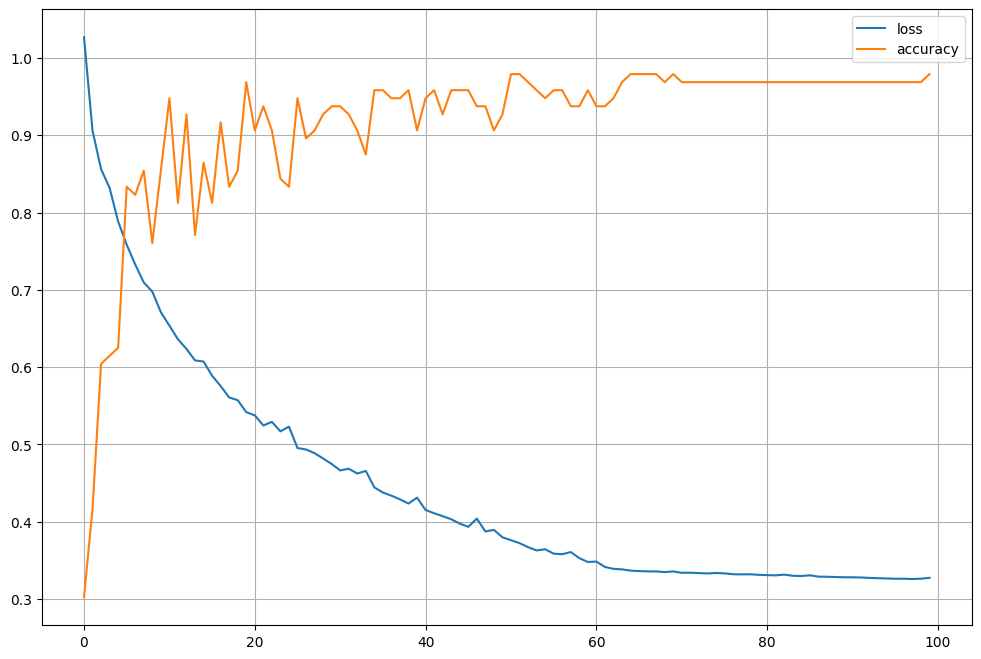

In [9]:
import matplotlib.pyplot as plt

#그래프 출력
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [10]:
#모델 평가 - 마지막 학습 내용에 대한 것
loss, accuracy = model.evaluate(X_test, y_test,  verbose=0)
print("정확도 = {:.2f}".format(accuracy))

정확도 = 0.97


In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
print(pred[:10])

# 최대값의 인덱스를 추출
y_test_class = np.argmax(y_test,axis=1)
pred_class = np.argmax(pred,axis=1)

print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class,pred_class))

1/1 [==============================] - 0s 81ms/step
[[2.0369221e-02 5.4831588e-01 4.3131486e-01]
 [9.0056521e-01 9.5481865e-02 3.9528939e-03]
 [1.6528253e-02 4.7073367e-01 5.1273811e-01]
 [8.3566345e-03 4.6381834e-01 5.2782500e-01]
 [9.0053014e-02 6.6853440e-01 2.4141252e-01]
 [3.7399644e-03 3.6479729e-01 6.3146281e-01]
 [8.8935620e-01 1.0512288e-01 5.5208583e-03]
 [2.6669041e-03 2.6986068e-01 7.2747242e-01]
 [2.6306401e-03 2.7958500e-01 7.1778435e-01]
 [9.6607387e-01 3.3345345e-02 5.8081653e-04]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 2 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [12]:
model.save('data/iris/iris.h5')

c:\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## - titanic

In [4]:
import pandas as pd
#데이터 로딩
df = pd.read_csv('./data/titanic/train3.csv')
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


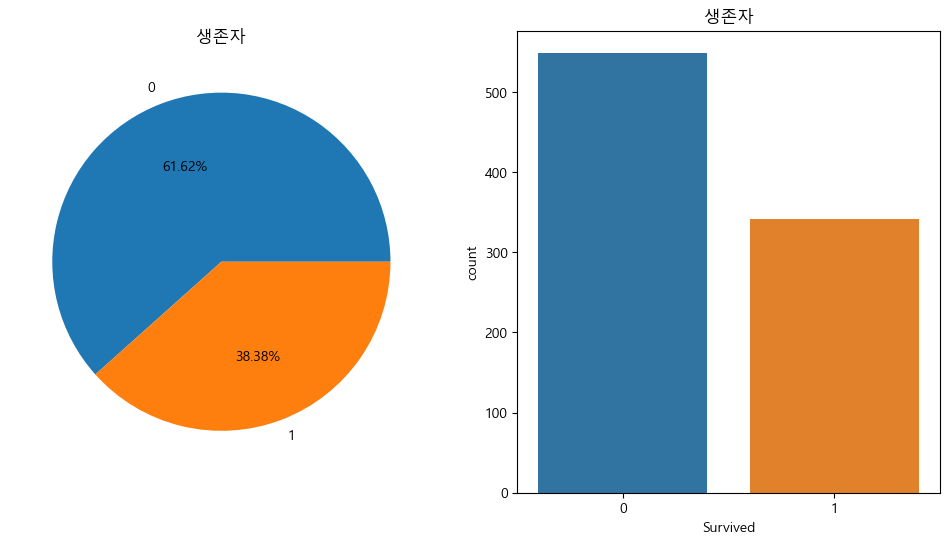

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

f,ax=plt.subplots(1,2,figsize=(12,6))
df['Survived'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('생존자')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=df,ax=ax[1])
ax[1].set_title('생존자')
plt.show()

<Axes: >

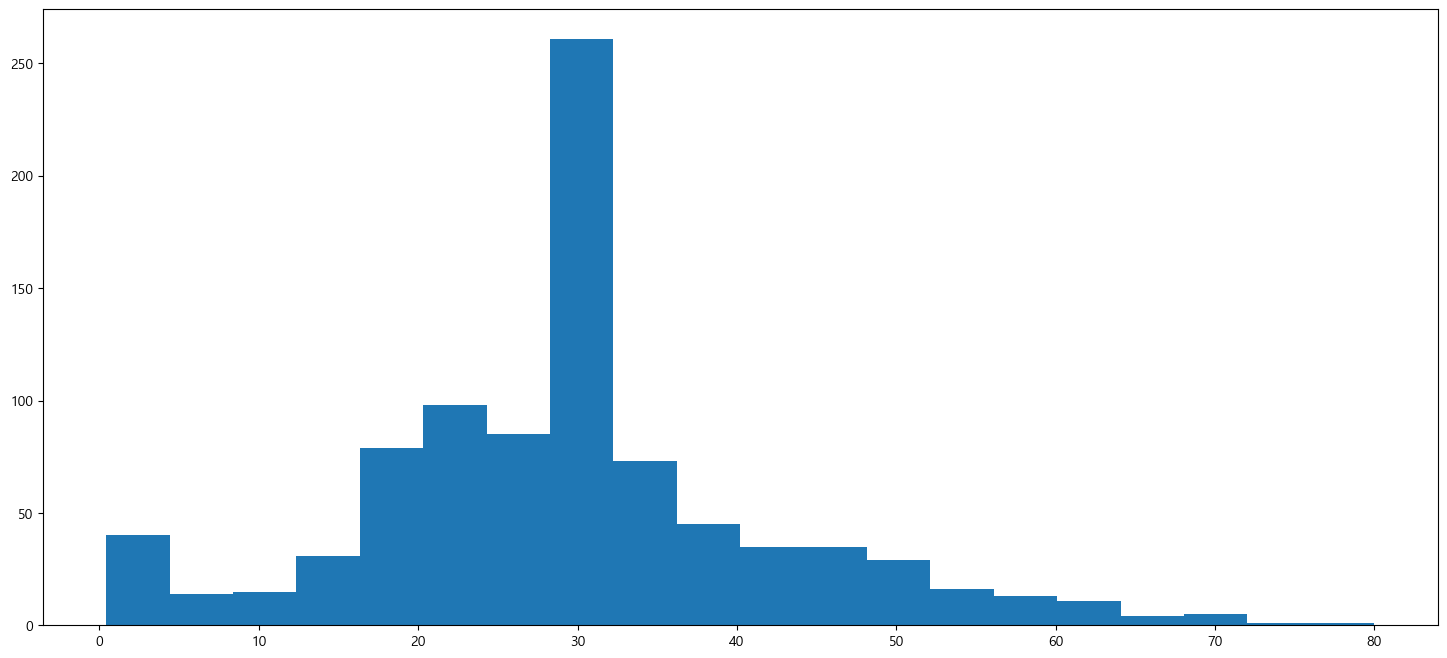

In [7]:
#승객들의 연령 분포
df['Age'].hist(bins=20,figsize=(18,8),grid=False)

In [8]:
#객실등급별 통계
df.groupby('Pclass1').mean()

,Survived,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass1,,,,,,,,,
0,0.305185,0.272593,0.727407,0.674074,0.325926,27.412963,0.557037,0.389630,15.580055
1,0.629630,0.000000,0.000000,0.564815,0.435185,37.089907,0.416667,0.356481,84.154687


In [9]:
df.groupby('Pclass2').mean()

,Survived,Pclass1,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass2,,,,,,,,,
0,0.360679,0.305516,0.694484,0.663366,0.336634,29.726082,0.554455,0.381895,35.208073
1,0.472826,0.000000,0.000000,0.586957,0.413043,29.884946,0.402174,0.380435,20.662183


In [10]:
df.groupby('Pclass3').mean()

,Survived,Pclass1,Pclass2,male,female,Age,SibSp,Parch,Fare
Pclass3,,,,,,,,,
0,0.557500,0.54,0.46,0.575000,0.425000,33.775625,0.410000,0.367500,54.948135
1,0.242363,0.00,0.00,0.706721,0.293279,26.486599,0.615071,0.393075,13.675550


c:\python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


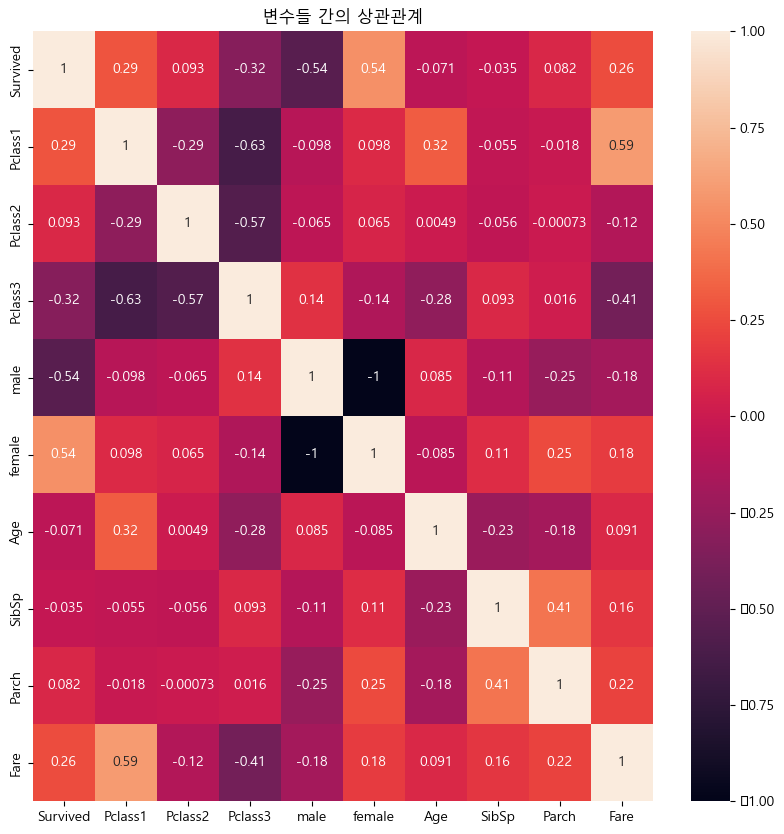

In [11]:
#상관관계 분석

# -1.0 ~ 0.0 : 음의 상관 관계
# 0.0 ~ 1.0 : 양의 상관 관계
# 상관관계가 너무 높다면 다중공선성을 의심해봐야함

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linecolor="white")
plt.title('변수들 간의 상관관계')
plt.show()

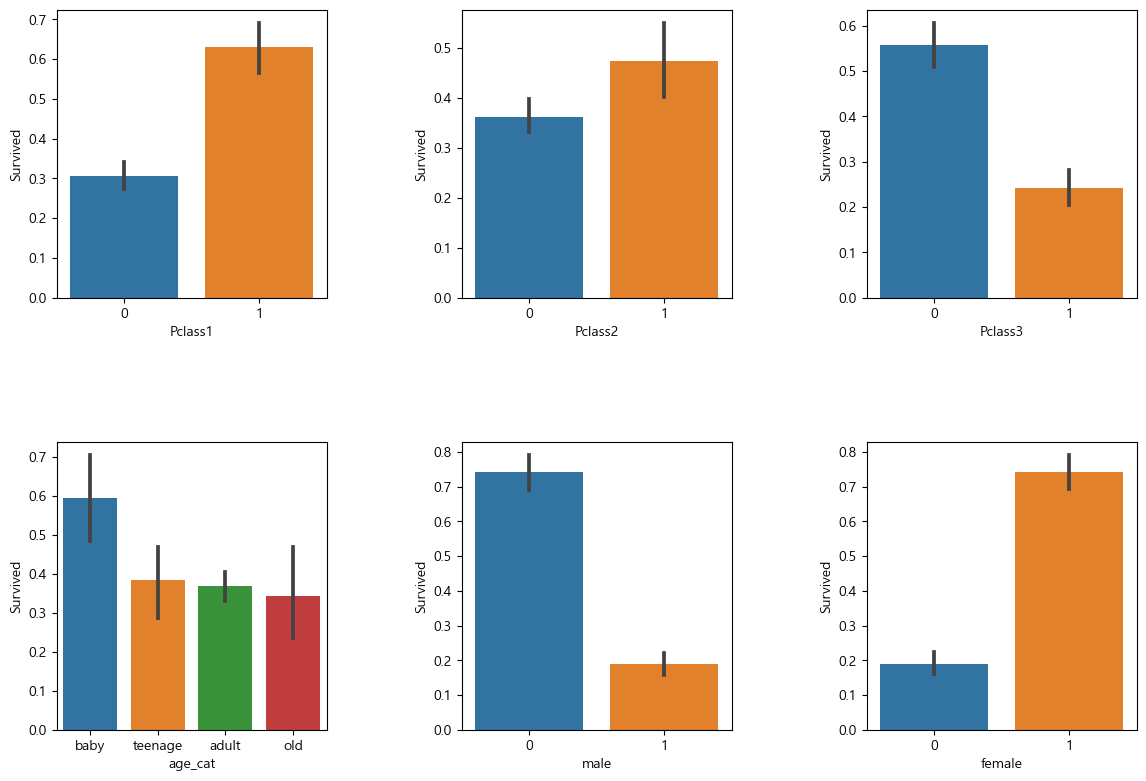

In [12]:
#연령대를 나눠서 분석
df['age_cat'] = pd.cut(df['Age'], bins=[0, 10, 20, 50, 100], include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,8])

plt.subplot(231)
#막대 위의 세로선은 오차범위를 의미함(기본값은 ci=95)
sns.barplot(x='Pclass1', y='Survived', data=df)
plt.subplot(232)
sns.barplot(x='Pclass2', y='Survived', data=df)
plt.subplot(233)
sns.barplot(x='Pclass3', y='Survived', data=df)
plt.subplot(234)
sns.barplot(x='age_cat', y='Survived', data=df)
plt.subplot(235)
sns.barplot(x='male',y='Survived',data=df)
plt.subplot(236)
sns.barplot(x='female',y='Survived',data=df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

#1등석,2등석인 경우 생존률이 높음, 3등석은 생존률이 낮음
#baby와 female의 생존률이 높음

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10740\1024695669.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax = ax, color="blue", shade = True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10740\1024695669.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax =g, color="green", shade= True)


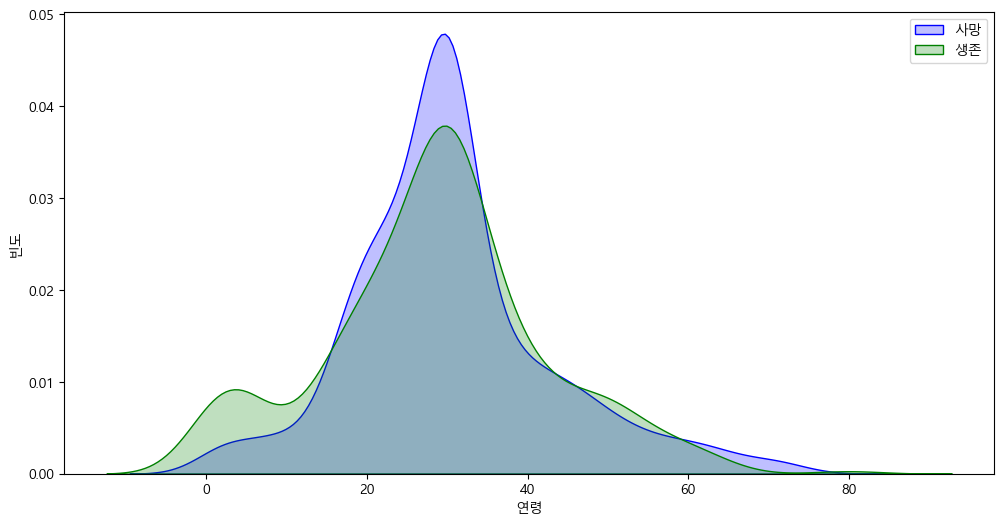

In [13]:
#나이 분포 곡선(어린아이들의 생존률이 상대적으로 높음)
f,ax = plt.subplots(figsize=(12,6))

#커널 밀도(kernel density) 그래프 : 히스토그램보다 부드러운 형태의 분포 곡선
g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax = ax, color="blue", shade = True)
g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax =g, color="green", shade= True)
g.set_xlabel("연령")
g.set_ylabel("빈도")
g.legend(["사망","생존"])

In [14]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
train_cols=df.columns[1:-1]

X=df[train_cols] #독립변수
y=df['Survived'] #종속변수

#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [16]:
X = X_samp[train_cols] # 독립변수
y = y_samp["Survived"]

In [17]:
from sklearn.model_selection import train_test_split

#데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 이진분류
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,761
Trainable params: 13,761
Non-trainable params: 0
_________________________________________________________________


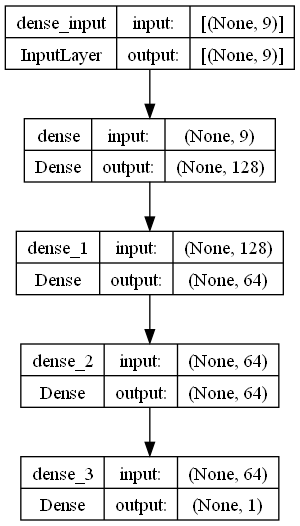

In [19]:
from keras.utils import plot_model  
plot_model(model,show_shapes=True)

<Axes: >

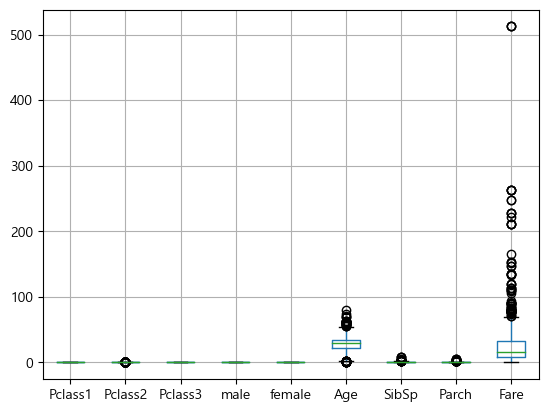

In [20]:
X_train.boxplot()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 넘파이 배열로 바뀜
# 넘파이 배열 => 데이터프레임
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)

<Axes: >

c:\python39\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


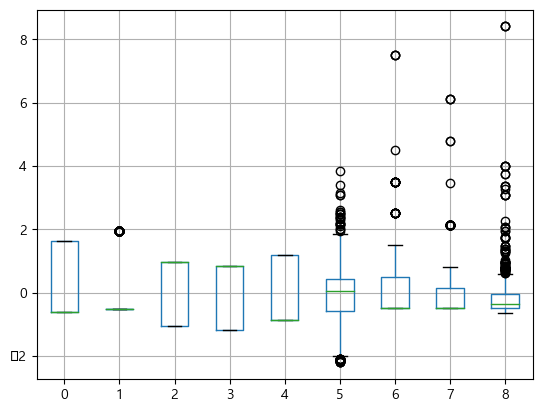

In [22]:
X_train_scaled.boxplot()

In [24]:
# 모델 저장뿐만 아니라 스케일러도 저장해둬야함
# 테스트 데이터에도 적용해야하기 때문
from joblib import dump
dump(scaler, './data/titanic/scaler.model', compress=True)

['./data/titanic/scaler.model']

Epoch 1/500
18/18 [==============================] - 2s 15ms/step - loss: 0.2150 - accuracy: 0.7093
Epoch 2/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1527 - accuracy: 0.7916
Epoch 3/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1423 - accuracy: 0.7879
Epoch 4/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1427 - accuracy: 0.8026
Epoch 5/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1387 - accuracy: 0.8026
Epoch 6/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1340 - accuracy: 0.8190
Epoch 7/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1329 - accuracy: 0.8208
Epoch 8/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1311 - accuracy: 0.8318
Epoch 9/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1324 - accuracy: 0.8117
Epoch 10/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1287 - accuracy: 0.8355
Epoch 11

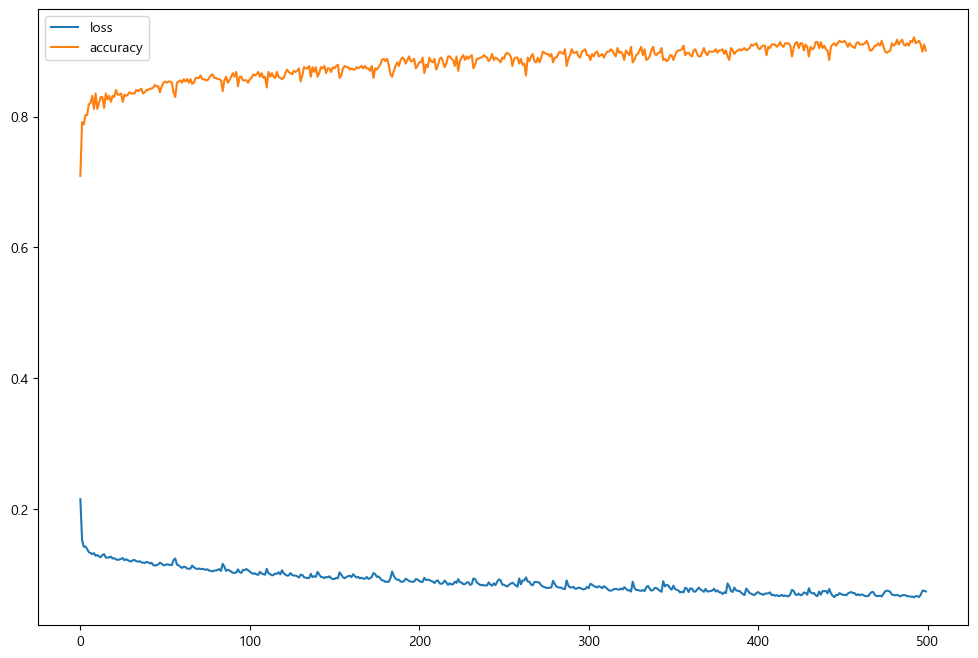

In [25]:
#모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=500)

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.show()

In [26]:
# 7. 모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)

print('학습용')
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

scores = model.evaluate(X_test_scaled, y_test, verbose=1)

print('검증용')
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

18/18 [==============================] - 0s 4ms/step - loss: 0.0707 - accuracy: 0.9068
학습용
[0.07073653489351273, 0.9067641496658325]
accuracy: 90.68%
5/5 [==============================] - 0s 4ms/step - loss: 0.2190 - accuracy: 0.7518
검증용
[0.21901988983154297, 0.7518247961997986]
accuracy: 75.18%


In [27]:
#1등석, 2등석, 3등석, 남성여부, 여성여부, 나이, 형제자매, 부모자녀, 요금
#3등석, 남성, 19세, 형제자매2, 부모자녀0, 요금50
person1 = [[0, 0, 1, 1, 0, 19, 2, 0, 50]]

#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]

#2등석, 여성, 40세, 형제자매1, 부모자녀1, 요금70
person3 = [[0, 1, 0, 0, 1, 40, 1, 1, 70]]

#스케일링을 해야 할 경우
person1=scaler.transform(person1)
person2=scaler.transform(person2)
person3=scaler.transform(person3)

print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

1/1 [==============================] - 0s 117ms/step


c:\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[0.00133617]]
1/1 [==============================] - 0s 24ms/step
[[1.]]
1/1 [==============================] - 0s 28ms/step
[[1.]]


In [28]:
#모형을 지정한 디렉토리에 저장
model.save('./data/titanic/titanic.h5')

In [ ]:
#netron 다운로드 및 테스트  
#https://github.com/lutzroeder/netron

## - OZONE

In [2]:
# 단순하게 정확도가 높다고해서 좋은 성능을 가진 모델이 아니다.
# precision 정확도(모형)
# recall 재현율 : 실제 현상을 얼마나 잘 발견했는가

# 데이터 불균형
# 언더 샘플링 : 재현율이 상당히 높아짐
# 실제 현상을 왜곡하는것이 아닌가?싶은데 궁극적으로 1을 더 잘 찾아냄
# 데이터 수와 데이터 분포를 확인하는 것이 중요

# 상관계수
# x, y 가 얼마나 상관도가 있는가
# 음의 상관관계 -1.0 / 양의 상관관계 1.0

# 학습용과 검증용을 나누는 이유
# 학습용과 검증용을 나누지 않으면 과적합(과대적합)이 발생할 확률이 높음
# 과적합(과대적합) over fitting : 과한 학습
# 과소적합 under fitting : 학습 부족

# 신경망
# input 입력
# hidden 계산
# output 출력

In [3]:
# pip install tensorboard

In [4]:
import pandas as pd

# csv 파일을 로딩
df = pd.read_csv('./data/ozone/ozone2.csv')
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


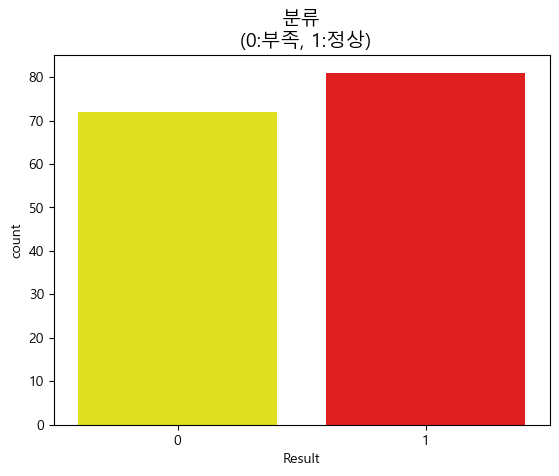

In [5]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(\
fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

colors = ['yellow','red']

sns.countplot(x='Result', data=df, palette = colors)
plt.title('분류\n (0:부족, 1:정상)', fontsize=14)
plt.show()
# 불균형 데이터셋

In [6]:
train_cols=['Solar.R', 'Wind', 'Temp']

X = df[train_cols]  
y = df['Result']

In [7]:
# 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['Result'].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

c:\python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


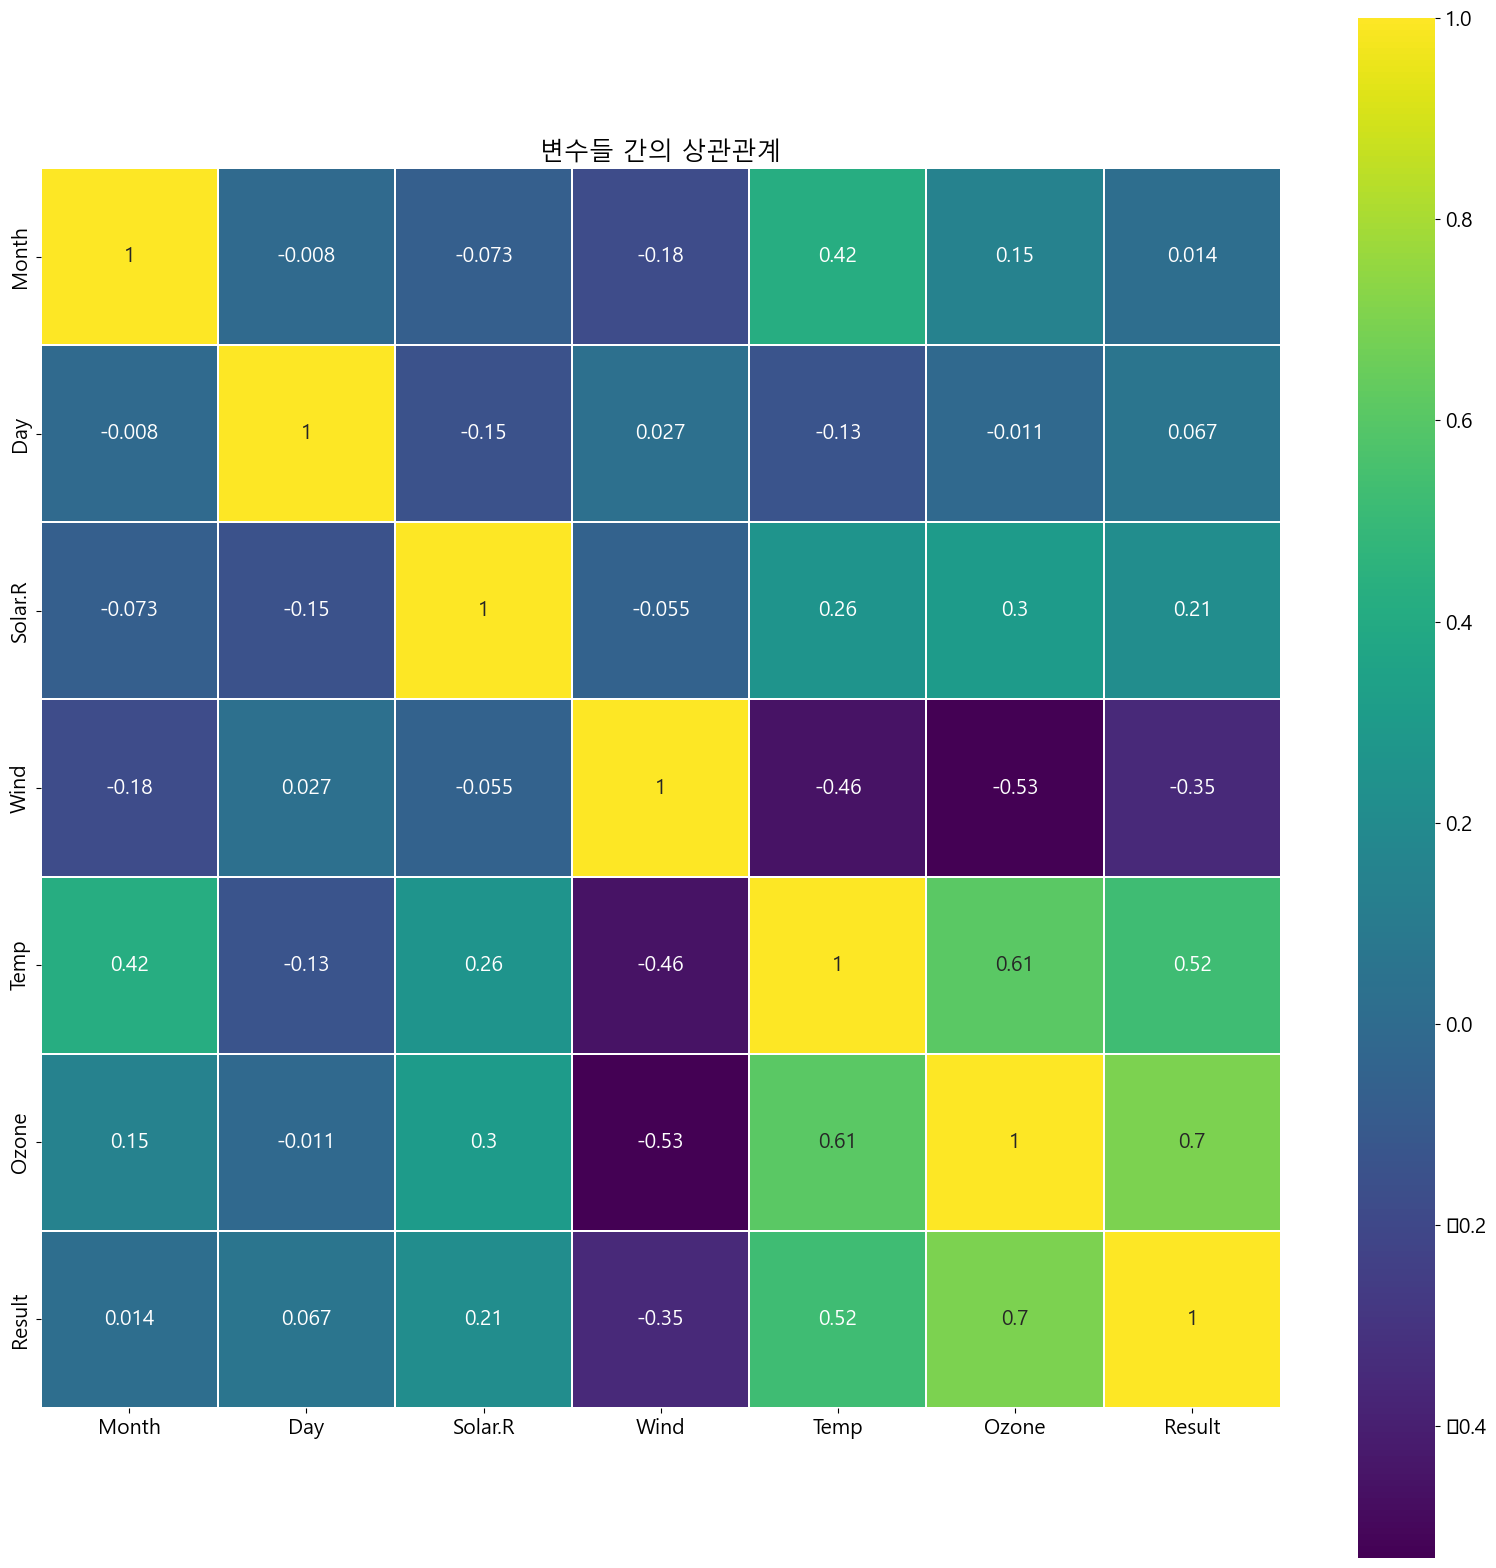

In [8]:
X = X_samp[train_cols]
y = y_samp['Result']

df_samp["Result"].value_counts()

#상관계수 행렬 그래프
plt.figure(figsize=(20, 20))
plt.rc('font', size=15)
sns.heatmap(df.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('변수들 간의 상관관계')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
#데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

# 3. 모델 구성
model = Sequential(name='mymodel')

# 은닉층 - 노드개수, 독립변수 개수, 활성화함수 relu
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu',name='hidden-1'))
model.add(Dense(64, activation='relu',name='hidden-2'))
model.add(Dense(64, activation='relu',name='hidden-3'))

# 출력층 - sigmoid : 0.0~1.0
model.add(Dense(1, activation='sigmoid',name='output'))

# 4. 모델 학습과정 설정
# 손실함수 - 평균제곱오차, 최적화함수, 분류문제이기때문에 정확도로 성능 측정
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [11]:
# 발표나 보고서에 모형 구성과 세부 파라미터 어떻게 구축했는지 설명하는것이 좋음
model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 128)               512       
                                                                 
 hidden-2 (Dense)            (None, 64)                8256      
                                                                 
 hidden-3 (Dense)            (None, 64)                4160      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 12,993
Trainable params: 12,993
Non-trainable params: 0
_________________________________________________________________


In [12]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train) # 패턴을 분석

X_train_scaled=scaler.transform(X_train) # 분석한 패턴에 맞게 변환
X_test_scaled=scaler.transform(X_test) # 분석한 패턴에 맞게 변환

In [13]:
from datetime import datetime  
import tensorflow as tf 

# 학습 히스토리를 저장한 파일
logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  
logdir

'c:/logs/20230720-121847'

In [14]:
# pip install tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  

# 5. 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=500,callbacks=[tensorboard_callback])

Epoch 1/500
4/4 [==============================] - 2s 9ms/step - loss: 0.2445 - accuracy: 0.5652
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2244 - accuracy: 0.7652
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2083 - accuracy: 0.7478
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1922 - accuracy: 0.7478
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1783 - accuracy: 0.7565
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1671 - accuracy: 0.7652
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1571 - accuracy: 0.7739
Epoch 8/500
4/4 [==============================] - 0s 32ms/step - loss: 0.1529 - accuracy: 0.7826
Epoch 9/500
4/4 [==============================] - 0s 8ms/step - loss: 0.1490 - accuracy: 0.7913
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1465 - accuracy: 0.7826
Epoch 11/500
4/4 [=========

In [15]:
#anaconda prompt에서 실행 cmd창
#tensorboard --logdir=로그파일경로

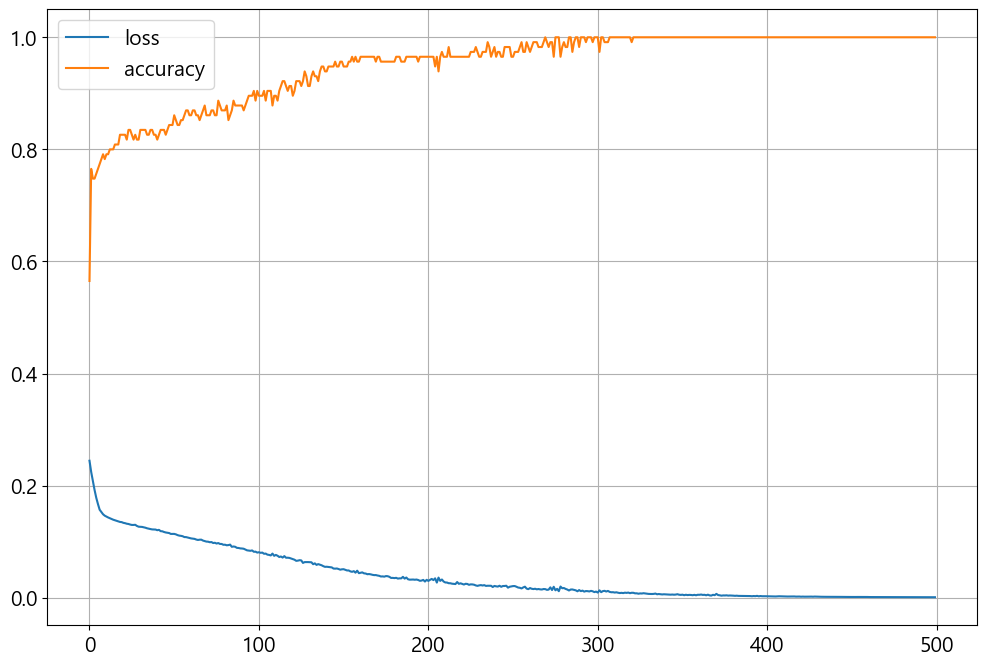

In [16]:
# 6. 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #학습용 데이터셋의 손실률
plt.plot(hist.history['accuracy']) #학습용 데이터셋의 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [17]:
# 7. 모델 평가
scores = model.evaluate(X_train_scaled, y_train)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

scores = model.evaluate(X_test_scaled, y_test)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

4/4 [==============================] - 0s 5ms/step - loss: 8.7054e-04 - accuracy: 1.0000
[0.0008705361397005618, 1.0]
accuracy: 100.00%
1/1 [==============================] - 0s 33ms/step - loss: 0.3023 - accuracy: 0.6897
[0.3023066818714142, 0.6896551847457886]
accuracy: 68.97%


In [18]:
#새로운 값 예측
#일조량 25, 풍량 10.8, 화씨온도 71도일 때의 오존량

test_set = [[25, 10.8, 71]]
test_set=scaler.transform(test_set)
print(model.predict(test_set)) # 1일 확률 0%

1/1 [==============================] - 0s 121ms/step
[[0.08542405]]


c:\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
#일조량 255, 풍량 4.3, 화씨온도 90도일 때의 오존량
test_set = [[25, 4.3, 90]]
test_set=scaler.transform(test_set)
print(model.predict(test_set)) # 1일 확률 98.5%

1/1 [==============================] - 0s 82ms/step
[[0.9999839]]


c:\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
##############################################
# model.save('./data/ozone/ozone') # h5 확장자로 저장하지않으면 가중치 등 자세하게 쪼갲져서 저장됨
model.save('./data/ozone/ozone.h5')
##############################################
import joblib
joblib.dump(scaler,'./data/ozone/scaler.model')

In [ ]:
# python
# rate = '{:.2f}%'.format(rate[0][0]*100)
#  key                 value

# html
# {{rate}}

## - university(대학평가)

In [1]:
#대학평가(kaggle에서 수집한 데이터를 가공하여 실습)
# csv 파일을 로딩
import pandas as pd
df = pd.read_csv("./data/school/data.csv")
df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

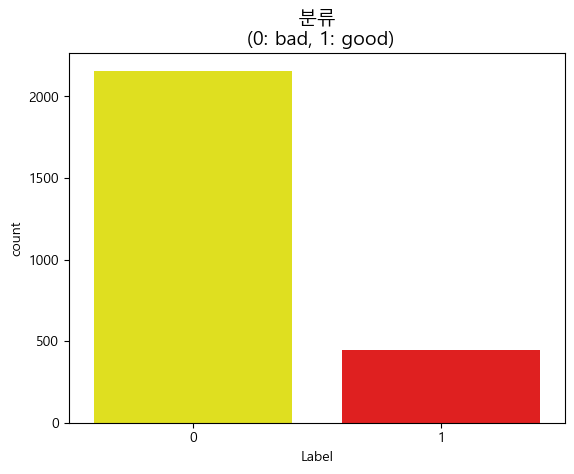

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot(x='Label', data=df, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)

#불균형 데이터셋

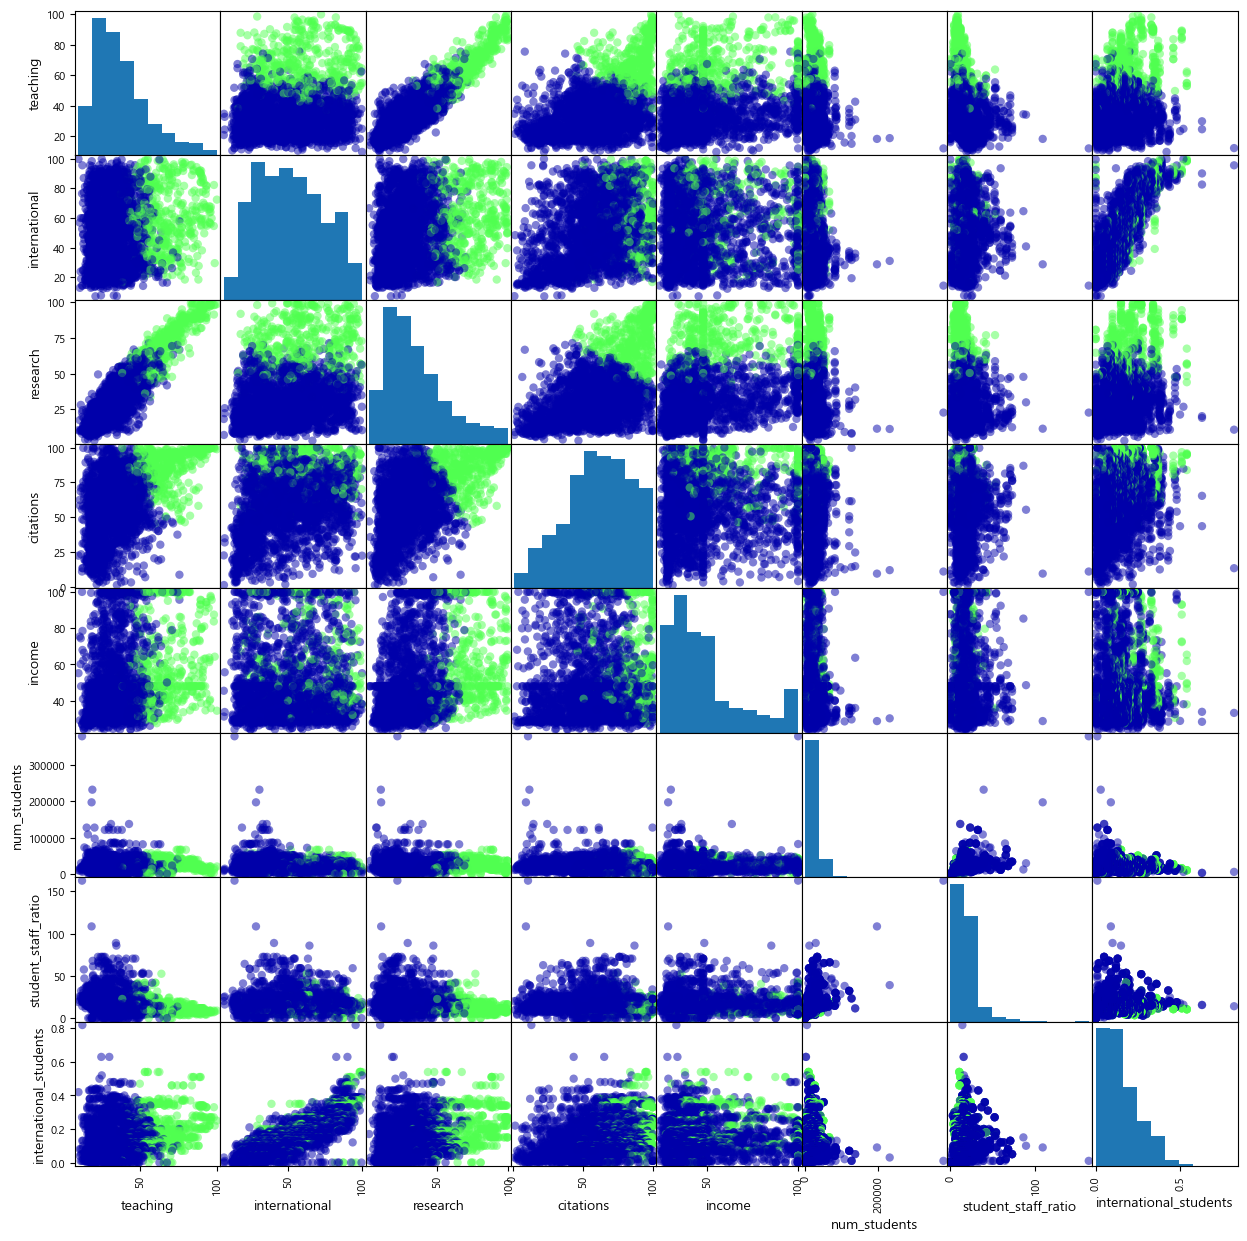

In [3]:
train_cols = df.columns[0:8]

X = df[train_cols] # 독립변수
y = df["Label"] # 종속변수

import mglearn

#산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)
plt.show()

In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Label'])

df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Label"].value_counts()

Label
0    445
1    445
Name: count, dtype: int64

In [5]:
X = df_samp[train_cols] # 독립변수
y = df_samp["Label"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [7]:
from keras import Sequential
from keras.layers import Dense

class MyModel(Sequential):
    def __init__(self, input_nodes, hidden_layers,num_classes):
        super(MyModel, self).__init__(name='my_model')
        self.num_classes = num_classes
        self.add(Dense(hidden_layers[0], input_shape=(input_nodes,), activation='relu'))
        self.add(Dense(hidden_layers[1], activation='relu'))
        self.add(Dense(hidden_layers[2], activation='relu'))
        self.add(Dense(num_classes, activation='sigmoid'))

In [8]:
model = MyModel(len(X_train.columns), [128,64,32],1)
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


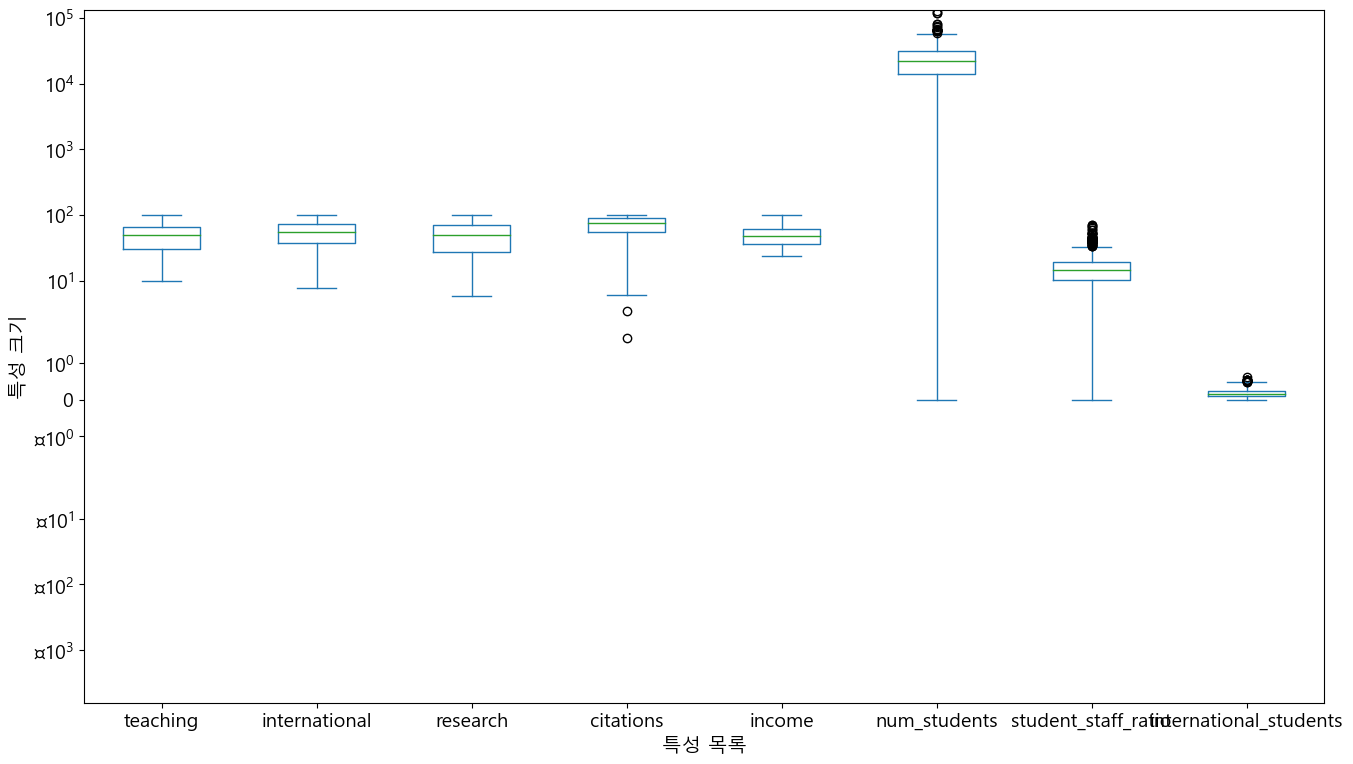

In [9]:
# 스케일링 하기 전 : 각 컬럼의 분포와 단위가 맞지 않음
plt.rcParams["figure.figsize"]=(16,9)
plt.rcParams["font.size"]=14
df_samp[train_cols].plot.box()
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.show()

In [10]:
# 학습용 데이터셋에서 특성별 최소값 계산
min_on_tr = X_train.min(axis=0)

# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산
range_on_tr = (X_train - min_on_tr).max(axis=0)

# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨
X_train_scaled = (X_train - min_on_tr) / range_on_tr

print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))

# 검증용 데이터셋에도 같은 작업을 적용
# 학습용 데이터셋에서 계산한 최소값과 범위를 사용
X_test_scaled = (X_test - min_on_tr) / range_on_tr

특성별 최소값
teaching                  0.0
international             0.0
research                  0.0
citations                 0.0
income                    0.0
num_students              0.0
student_staff_ratio       0.0
international_students    0.0
dtype: float64
특성별 최대값
teaching                  1.0
international             1.0
research                  1.0
citations                 1.0
income                    1.0
num_students              1.0
student_staff_ratio       1.0
international_students    1.0
dtype: float64


In [11]:
from keras.callbacks import EarlyStopping  
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=5)

# 조기학습 종료시 가장 성능이 좋았던 모형 저장
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# 5. 모델 학습
# 신경망에서는 validation 필수 / 튜닝할 하이퍼파라미터 수가 많기 때문에
hist = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[es, mc])

Epoch 1/50
18/18 [==============================] - 2s 27ms/step - loss: 0.2363 - accuracy: 0.6204 - val_loss: 0.2042 - val_accuracy: 0.8671
Epoch 2/50
18/18 [==============================] - 0s 12ms/step - loss: 0.1717 - accuracy: 0.8805 - val_loss: 0.1213 - val_accuracy: 0.9161
Epoch 3/50
18/18 [==============================] - 0s 18ms/step - loss: 0.1038 - accuracy: 0.8981 - val_loss: 0.0706 - val_accuracy: 0.9510
Epoch 4/50
18/18 [==============================] - 0s 11ms/step - loss: 0.0766 - accuracy: 0.9069 - val_loss: 0.0497 - val_accuracy: 0.9510
Epoch 5/50
18/18 [==============================] - 0s 15ms/step - loss: 0.0603 - accuracy: 0.9262 - val_loss: 0.0430 - val_accuracy: 0.9580
Epoch 6/50
18/18 [==============================] - 0s 10ms/step - loss: 0.0565 - accuracy: 0.9279 - val_loss: 0.0339 - val_accuracy: 0.9650
Epoch 7/50
18/18 [==============================] - 0s 10ms/step - loss: 0.0484 - accuracy: 0.9402 - val_loss: 0.0315 - val_accuracy: 0.9650
Epoch 8/50
18

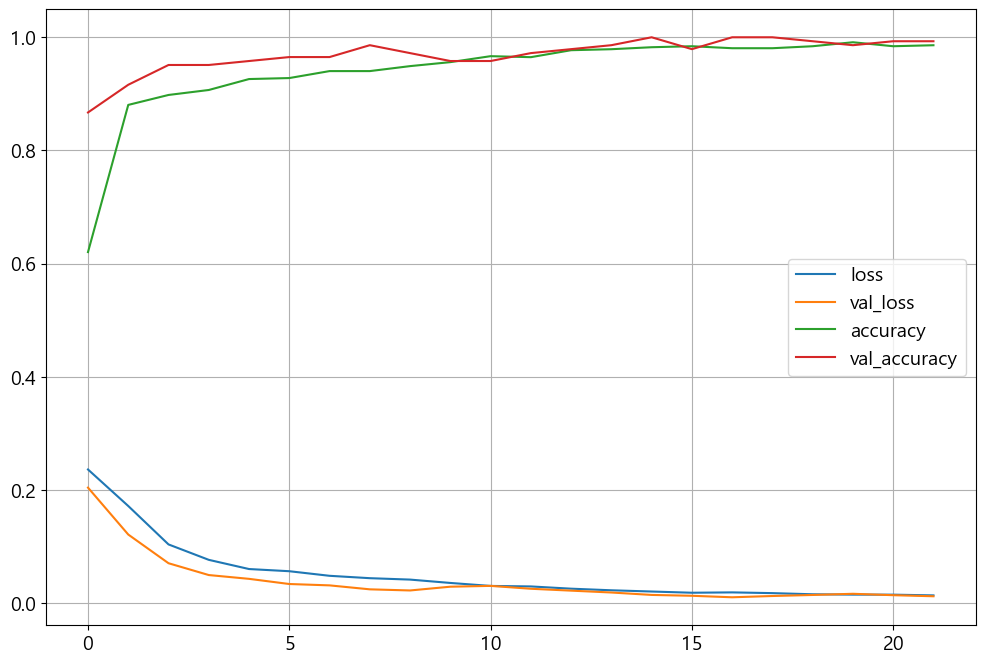

In [12]:
# 6. 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [13]:
# 7. 모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)

print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

23/23 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9944
[0.011751404963433743, 0.9943820238113403]
accuracy: 99.44%
6/6 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.9944
[0.012294863350689411, 0.9943820238113403]
accuracy: 99.44%


## - 신경망 교차검증

In [1]:
# 교차검증, 하이퍼 파라미터 최적화
# cross validation
# 학습용 : 검증용 (8 : 2)
# 데이터 수가 적을때 실험을 안정적으로 할 수 있음
# GridSearchCV

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

np.random.seed(0)
number_of_features = 100
features, target = make_classification(n_samples=10000, n_features=number_of_features,
                                       n_informative=3, n_redundant=0, n_classes=2,
                                       weights=[.5,.5], random_state=0)

In [3]:
# binary_crossentropy 이진분류 - sigmoid
# categorical_crossentropy 다중분류 - softmax

In [4]:
from scikeras.wrappers import KerasClassifier

def create_network():
    network =Sequential()
    network.add(Dense(units=16, activation="relu", input_shape=(number_of_features,)))
    network.add(Dense(units=16, activation="relu"))
    network.add(Dense(units=1, activation="sigmoid"))
    network.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return network

In [5]:
#!pip install scikeras
neural_network = KerasClassifier(model=create_network, epochs=10, batch_size=100, verbose=0)
# 교차검증 / 교차검증횟수 3번 / 3번의 정확도가 나옴
cross_val_score(neural_network, features, target, cv=3)

array([0.90521896, 0.89528953, 0.89108911])

In [6]:
# 2. 하이퍼 파라미터 튜닝
#시간이 오래 걸림

from sklearn.model_selection import GridSearchCV
np.random.seed(0)
number_of_features = 10
features, target = make_classification(n_samples = 100, n_features = number_of_features,
                              n_informative = 3, n_redundant = 0, n_classes = 2,
                              weights = [.5, .5], random_state = 0)

In [7]:
def create_network(optimizer="rmsprop"):
    network =Sequential()
    network.add(Dense(units=16, activation="relu", input_shape=(number_of_features,)))
    network.add(Dense(units=16, activation="relu"))
    network.add(Dense(units=1, activation="sigmoid"))
    network.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"]) 
    return network

In [8]:
neural_network = KerasClassifier(model=create_network, verbose=0)

In [9]:
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)
grid_result = grid.fit(features, target)

In [10]:
# 최적의 파라미터 (정확도가 가장 높았던 모델의 파라미터들)
grid_result.best_params_

{'batch_size': 5, 'epochs': 10, 'optimizer': 'adam'}

In [11]:
# 교차검증 평균 점수들
grid_result.cv_results_['mean_test_score']

array([0.6 , 0.55, 0.6 , 0.7 , 0.62, 0.59, 0.58, 0.59, 0.56, 0.58, 0.5 ,
       0.5 ])

In [12]:
# 발표에서 평균내서 낼 수 있고 큰 값으로 제출할 수 있음
max(grid_result.cv_results_['mean_test_score'])

0.7

In [13]:
grid_result.best_estimator_

KerasClassifier(
	model=<function create_network at 0x0000029A3C0623A0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)